# §4: Classification

### Purpose and Motivation

Classification is a valuable machine learning tool in business and marketing as it helps identify patterns and make predictions based on data. It involves categorizing data into distinct groups based on their characteristics, allowing businesses to make informed decisions and tailor their marketing strategies to specific audiences. On the other hand, clustering is a technique used to group similar data points into clusters based on their similarities, without any prior knowledge of the group labels. This method helps in identifying underlying structures within data and finding hidden patterns, making it useful for market segmentation and identifying customer behavior. In this section, the author implements classification methods using a Marketing Targets Banking Dataset, selecting the dependent variable "y" and reducing the dataset to avoid too many fields for analysis once dummy variables are implemented.

### Data
Source:	https://www.kaggle.com/prakharrathi25/banking-dataset-marketing-targets

In [159]:
import pandas as pd
import numpy as np
import warnings #These two lines will ignore the warning messages
warnings.simplefilter("ignore")  

data0=pd.read_csv('Banking-Dataset-Marketing-Targets_test.csv', sep=';').dropna()

data0.head().transpose() # In order to show all the columns, you can use transpose()

,0,1,2,3,4
age,30,33,35,30,59
job,unemployed,services,management,management,blue-collar
marital,married,married,single,married,married
education,primary,secondary,tertiary,tertiary,secondary
default,no,no,no,no,no
balance,1787,4789,1350,1476,0
housing,no,yes,yes,yes,yes
loan,no,yes,no,yes,no
contact,cellular,cellular,cellular,unknown,unknown
day,19,11,16,3,5


In [137]:
data0.isnull().sum() # Need to check if there are missing values. Some models cannot handle missing values.

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [123]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 635.8+ KB


### Procedure (Step 1): Pre-processsing

Convert Categorical values to 0, 1

In [152]:
data0 = pd.concat([data0, pd.get_dummies(data0["job"], prefix = "job"), 
                      pd.get_dummies(data0["marital"], prefix = "marital"), 
                      pd.get_dummies(data0["education"], prefix = "education"),
                      pd.get_dummies(data0["housing"], prefix = "housing"),
                      pd.get_dummies(data0["loan"], prefix = "loan"),
                      pd.get_dummies(data0["contact"], prefix = "contact"),
                      pd.get_dummies(data0["default"], prefix = "default"),
                      pd.get_dummies(data0["poutcome"], prefix = "poutcome")], axis = 1)
                        
# Dropped additional variables from those above to avoid copious columns
data0 = data0.drop(["job", "marital", "education", "housing", "loan", "contact", "month", "default", "poutcome", "pdays", "day"], axis = 1)

data0["y"] = data0["y"].apply(lambda x: 1 if x == "yes" else 0) #apply() apply a if function to transform Attrition from Yes/No to 1/0. 

data0.head().transpose()

,0,1,2,3,4
age,30,33,35,30,59
balance,1787,4789,1350,1476,0
duration,79,220,185,199,226
campaign,1,1,1,4,1
previous,0,4,1,0,0
y,0,0,0,0,0
job_admin.,0,0,0,0,0
job_blue-collar,0,0,0,0,1
job_entrepreneur,0,0,0,0,0
job_housemaid,0,0,0,0,0


### Procedure (Step 2): Create Training and Testing data, and check class distribution 

In [153]:
from sklearn.model_selection import train_test_split


# Model structure and assumptions
X = data0.drop(['y'], axis = 1) 
y = data0['y']          

# Going with an 80/20 distribution for cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, X_test.shape)

(3616, 37) (905, 37)


In [140]:
type(X_train)

pandas.core.frame.DataFrame

In [141]:
type(y_train)

pandas.core.series.Series

In [142]:
y_train.value_counts()/len(y_train) # value_counts() returns the counts of different values in a Series, len() is total number. 

0    0.88302
1    0.11698
Name: y, dtype: float64

In [143]:
y_test.value_counts()/len(y_test)

0    0.891713
1    0.108287
Name: y, dtype: float64

### Procedure (Step 3): Stratified Sampling
Stratified sampling is a sampling technique used in statistics to ensure that the sample accurately represents the population being studied. The population is divided into subgroups, or strata, based on a particular characteristic, such as age, gender, or income level. The samples are then selected from each stratum in proportion to their representation in the population. This helps to ensure that each stratum is well represented in the sample, and reduces the sampling error, leading to more accurate results. Stratified sampling is particularly useful when there are significant differences between the subgroups in the population being studied, as it helps to ensure that these differences are accurately reflected in the sample.

In [144]:
data0YES=data0[data0['y']==1] 
data0NO=data0[data0['y']==0] 

print(data0YES.shape, data0NO.shape)

data0YES.head()

(521, 38) (4000, 38)


,age,balance,duration,campaign,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,loan_yes,contact_cellular,contact_telephone,contact_unknown,default_no,default_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
13,20,502,261,1,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
30,68,4189,897,2,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
33,32,2536,958,6,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
34,49,1235,354,3,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
36,78,229,97,1,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [145]:
YEStrain=data0YES.sample(frac=0.8,random_state=42) 
YEStest=data0YES.drop(YEStrain.index)

NOtrain=data0NO.sample(frac=0.8,random_state=42) 
NOtest=data0NO.drop(NOtrain.index)

print(YEStrain.shape, YEStest.shape, NOtrain.shape, NOtest.shape)

(417, 38) (104, 38) (3200, 38) (800, 38)


In [146]:
train=pd.concat([YEStrain,NOtrain]) #Here, we combine rows, so axis=0 which is the default value thus didn't specify
test=pd.concat([YEStest,NOtest])

X_train = train.drop(['y'], axis = 1) 
y_train = train['y'] 

X_test = test.drop(['y'], axis = 1) 
y_test = test['y'] 

print(train.shape, test.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3617, 38) (904, 38) (3617, 37) (3617,) (904, 37) (904,)


In [147]:
y_train.value_counts()/len(y_train) 

0    0.884711
1    0.115289
Name: y, dtype: float64

In [148]:
y_test.value_counts()/len(y_test)

0    0.884956
1    0.115044
Name: y, dtype: float64

#### Note: As we see above the train and testing sets we created are very similar, indicating a good model structure

### Procedure (Step 4): Classification Models

### - Classification Tree
A classification tree, also known as a decision tree, is a graphical representation of a decision-making process that uses a tree-like model to classify input data into various categories or classes. The tree consists of nodes that represent input variables, decision rules, and the output classes, and branches that connect them. The tree is constructed by recursively splitting the data into smaller and smaller subsets based on the input variables until the final output class is determined. Each split is chosen based on a specific criterion, such as entropy or Gini impurity, that helps to maximize the separation between the classes. The resulting tree provides a visual representation of the decision-making process and can be used to predict the output class for new input data. Classification trees are commonly used in machine learning for classification tasks, such as identifying whether a customer will purchase a product or not, based on their demographic and behavioral characteristics.

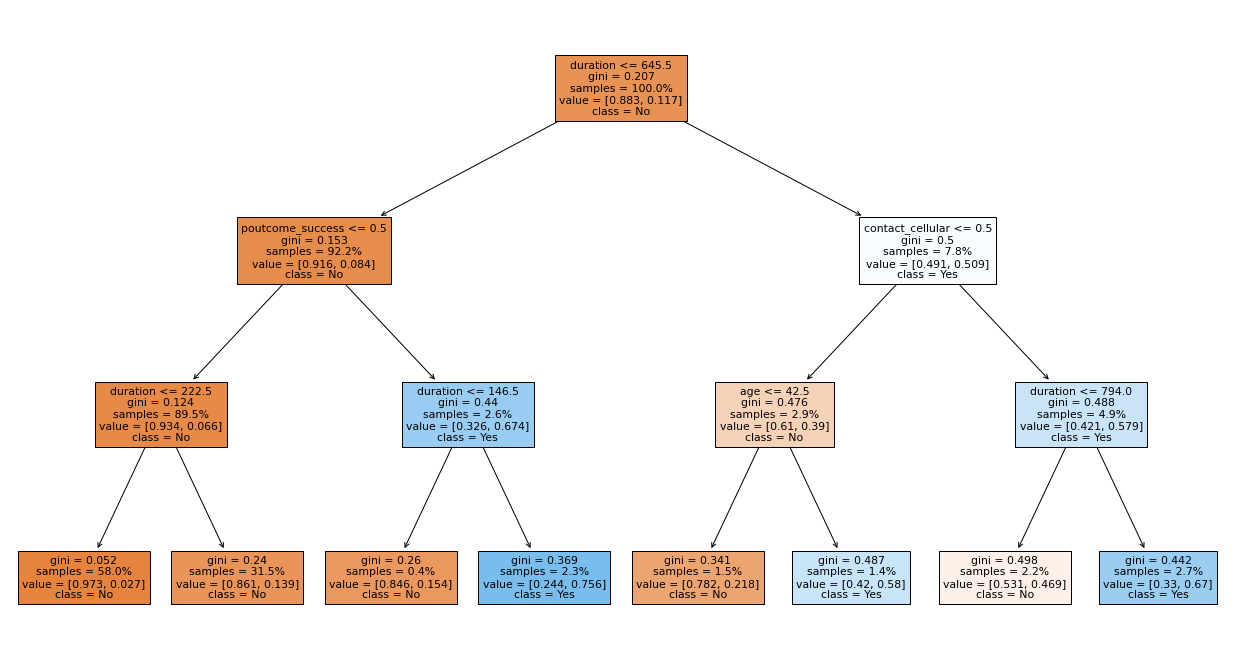

In [161]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt # This package is used to plot the tree. Here, it's used to decide the figure size.  

#model = DecisionTreeClassifier(class_weight='balanced')
model = DecisionTreeClassifier() # Fitting a decision tree model with default parameters
dt = GridSearchCV(model, param_grid={"max_depth": [0,1,2,3,4,5,6,7,8,9]}) # a dictionary with the parameter name as the key, and the list contains the options, default is 5 fold, but you can change it with additin parameters. 

dt = dt.fit(X_train, y_train) # you can also delete 'dt = '. dt.fit() modifies dt and also returns dt. 

plt.subplots(figsize=(22, 12)) # width & height, define the overall dimension of the figure
#plot_tree(dt.best_estimator_, feature_names=X_train.columns, class_names=['No','Yes'],filled=True, proportion=True) # CV built 5 trees (estimators), best_estimator_ is the one with best accuracy.
plot_tree(dt.best_estimator_, feature_names=X_train.columns, class_names=['No','Yes'],filled=True, proportion=True) 
plt.show()

In [154]:
y_pred_dt = dt.predict(X_test)

print("Decision tree accuracy for test set:", dt.score(X_test, y_test)) #score() is a method for DecisionTreeClassifier, it returns the mean accuracy on the given test data and labels.

print("\nClassification report:")
print(classification_report(y_test, y_pred_dt))

print(dt.best_estimator_.feature_importances_)

print(X_train.columns) # print the column names for reference. 

Decision tree accuracy for test set: 0.9027624309392265

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       807
           1       0.59      0.35      0.44        98

    accuracy                           0.90       905
   macro avg       0.76      0.66      0.69       905
weighted avg       0.89      0.90      0.89       905

[0.         0.         0.6652602  0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.03208323 0.
 0.         0.         0.         0.         0.         0.30265657
 0.        ]
Index(['age', 'balance', 'duration', 'campaign', 'previous', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
   

### - Logistic Regression
Logistic regression is a statistical method used to analyze the relationship between a dependent variable and one or more independent variables. It is commonly used in binary classification problems, where the dependent variable has two possible outcomes, such as "yes" or "no", "success" or "failure", etc. The goal of logistic regression is to model the probability of the dependent variable taking on one of the two possible outcomes, given the values of the independent variables.

In [155]:
from sklearn.linear_model import LogisticRegression

#model = LogisticRegression(class_weight='balanced')
model = LogisticRegression()
logreg = GridSearchCV(model,param_grid={"penalty": ['l1','l2']})

logreg.fit(X_train, y_train)

y_pred_log = logreg.predict(X_test)

print("Logistic regression accuracy for test set:", logreg.score(X_test, y_test))
print("\nClassification report:")
print(classification_report(y_test, y_pred_log))
print(logreg.best_estimator_.coef_)
print(logreg.best_estimator_.intercept_)
print(X_train.columns)

Logistic regression accuracy for test set: 0.8906077348066298

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       807
           1       0.49      0.20      0.29        98

    accuracy                           0.89       905
   macro avg       0.70      0.59      0.61       905
weighted avg       0.86      0.89      0.87       905

[[-1.25021509e-02 -8.81252312e-06  4.34100611e-03 -1.54106427e-01
   5.85642036e-02  8.11941688e-03 -3.88451051e-01 -1.01783132e-01
   2.73570471e-03  1.52126699e-02  2.85263030e-01 -3.72568087e-02
  -1.29764890e-01  2.40430798e-03 -1.42606223e-01 -5.30325099e-02
   3.00721579e-02  8.26228079e-02 -3.06407852e-01 -2.85302284e-01
  -8.59724863e-02 -3.69030624e-01 -4.40202320e-03 -4.96821942e-02
   2.37658478e-01 -7.46745806e-01 -1.41644251e-01 -3.67443076e-01
   7.71246775e-02  7.93613594e-02 -6.65573364e-01 -5.11525645e-01
   2.43831802e-03 -2.37764365e-01  2.00768245e-02  4.811903

### - Random Forest
Random forests are highly flexible and can handle a wide range of data types, including numerical, categorical, and missing data. They are also capable of handling high-dimensional data and can detect non-linear relationships between variables. Due to their accuracy, robustness, and versatility, random forests have become one of the most popular machine learning algorithms in statistics and data science.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#model = RandomForestClassifier(class_weight='balanced_subsample')
model = RandomForestClassifier()
rf = GridSearchCV(model,param_grid={"max_depth": [0,1,2,3,4,5,6,7,8,9]})
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random forest accuracy for test set:", rf.score(X_test, y_test))
print("\nClassification report:")
print(classification_report(y_test, y_pred_rf))

In [158]:
data_pred=X_test
data_pred['true_y']=y_test
data_pred['pred_y']=y_pred_rf 
data_pred.to_excel('Final_Data_Predictions.xlsx', index=None)
data_pred.head()

,age,balance,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,contact_telephone,contact_unknown,default_no,default_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,true_y,pred_y
2398,51,-2082,123,6,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
800,50,2881,510,2,5,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
2288,50,1412,131,3,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2344,37,0,247,13,0,0,0,0,0,1,...,0,1,1,0,0,0,0,1,0,0
3615,31,757,343,2,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


## Results & Discussion

The initial model had too many variables, but after reducing them, the classification models performed better. The testing and training ratios were similar for all models. Overall accuracy, precision, and recall were significantly higher than random guessing. Each model highlighted different important features for predicting the outcome, with the decision tree emphasizing call duration and previous outcome success, and the logistic regression providing insight into the strength of individual predictors. However, the random forest provided the least insight into the dataset's predictive power. Overall, the initial model structure provided a strong predictive framework.